In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [35]:
# 1.1 Import the dataset
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv" ,low_memory=False)

In [37]:
#1.2 Visualize the dataset 
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [38]:
#1.3 Print the columns of the DataFrame
print(df.columns)
#1.4 Identify the shape of the dataset
print(df.shape)
# 1.5 Identify the variables with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

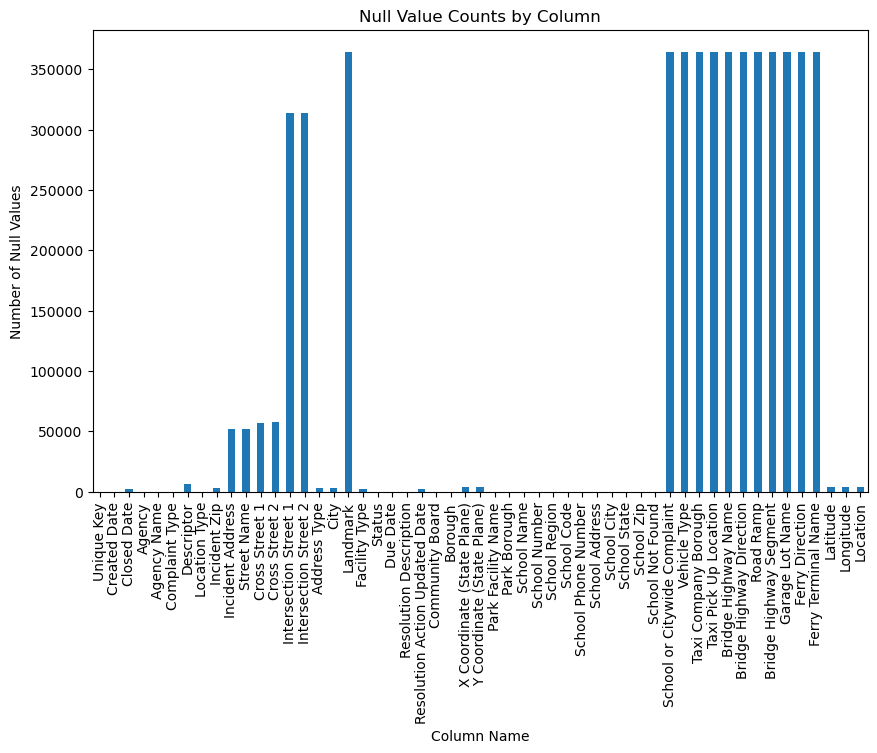

In [40]:
null_counts = df.isnull().sum()
# 2.1 Draw a frequency plot to show the number of null values in each column of the DataFrame
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
null_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Column Name')
ax.set_ylabel('Number of Null Values')
ax.set_title('Null Value Counts by Column')
plt.show()

In [ ]:
# Based on above columns perform some base imputing for NaN values

In [41]:
# 2.2.1 Remove the records whose Closed Datevalues are null
df = df.dropna(subset=['Closed Date'])

# Drop records with incorrect timeline
df = df[(df['Created Date'] < df['Closed Date'])]

In [42]:
# 2.3.1 Calculate the time elapsed in closed and creation date
df["Created Date"] = pd.to_datetime(df["Created Date"]) 
df["Closed Date"] = pd.to_datetime(df["Closed Date"])

In [43]:
# 2.3.2 Convert the calculated date to seconds to get a better representation 
df["Request_Closing_Time"] = abs(df["Closed Date"] - df["Created Date"]).dt.total_seconds()

In [44]:
# 2.3.3 View the descriptive statistics for the newly created column
df["Request_Closing_Time"].describe()

count    2.947690e+05
mean     1.466177e+04
std      2.280933e+04
min      6.100000e+01
25%      3.950000e+03
50%      8.409000e+03
75%      1.709700e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

In [48]:
df['City'] == "BROOKLYN"

26        False
36         True
38         True
40        False
41         True
          ...  
364538    False
364545     True
364547    False
364551    False
364555    False
Name: City, Length: 294769, dtype: bool

In [13]:
# 2.3.2 Convert the calculated date to seconds to get a better representation 
df["Request_Closing_Time"] = abs(df["Closed Date"] - df["Created Date"]).dt.total_seconds()

In [14]:
# 2.3.3 View the descriptive statistics for the newly created column
df["Request_Closing_Time"].describe()

count    2.947690e+05
mean     1.466177e+04
std      2.280933e+04
min      6.100000e+01
25%      3.950000e+03
50%      8.409000e+03
75%      1.709700e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

In [15]:
# 2.3.4 Check the number of null values in the Complaint_Type and City columns
print("Null values in Complaint Type:", df['Complaint Type'].isnull().sum())
print("Null values in City:", df['City'].isnull().sum())

Null values in Complaint Type: 0
Null values in City: 488


In [16]:
#2.3.5 Impute the NA value with Unknown City
df['City'].fillna("Unknown City", inplace=True)

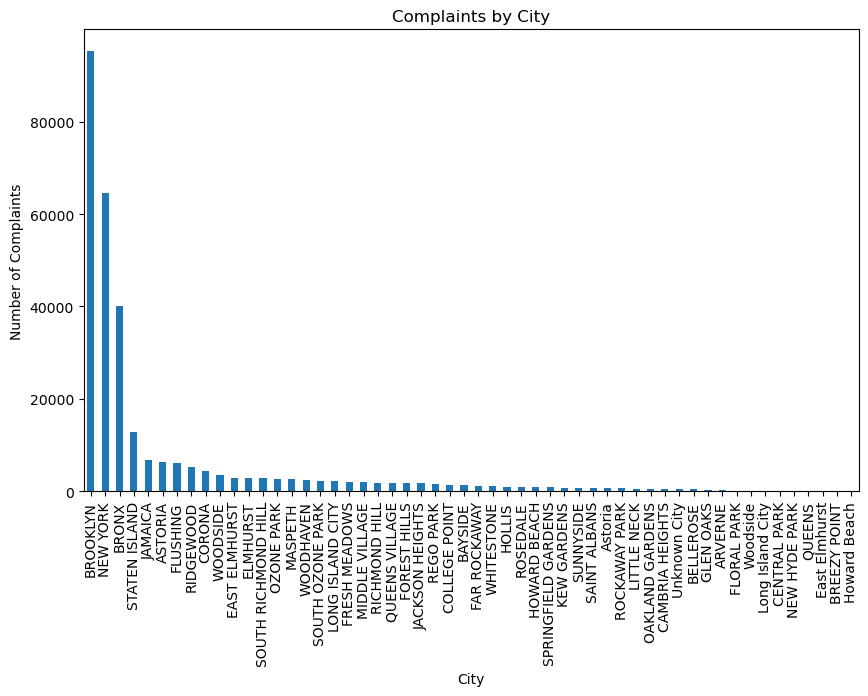

In [17]:
#2.3.6 Draw a frequency plot for the complaints in each city
fig, ax = plt.subplots(figsize=(10,6))
df['City'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('City')
ax.set_ylabel('Number of Complaints')
ax.set_title('Complaints by City')
plt.show()

In [18]:
df['City'] == "BROOKLYN"

26        False
36         True
38         True
40        False
41         True
          ...  
364538    False
364545     True
364547    False
364551    False
364555    False
Name: City, Length: 294769, dtype: bool

In [21]:
# 2.3.7 Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

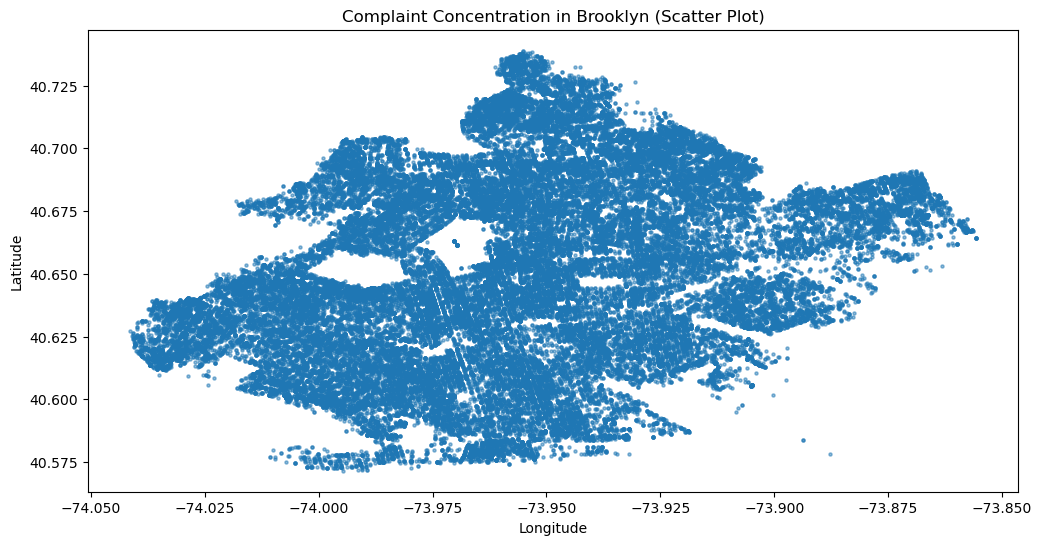

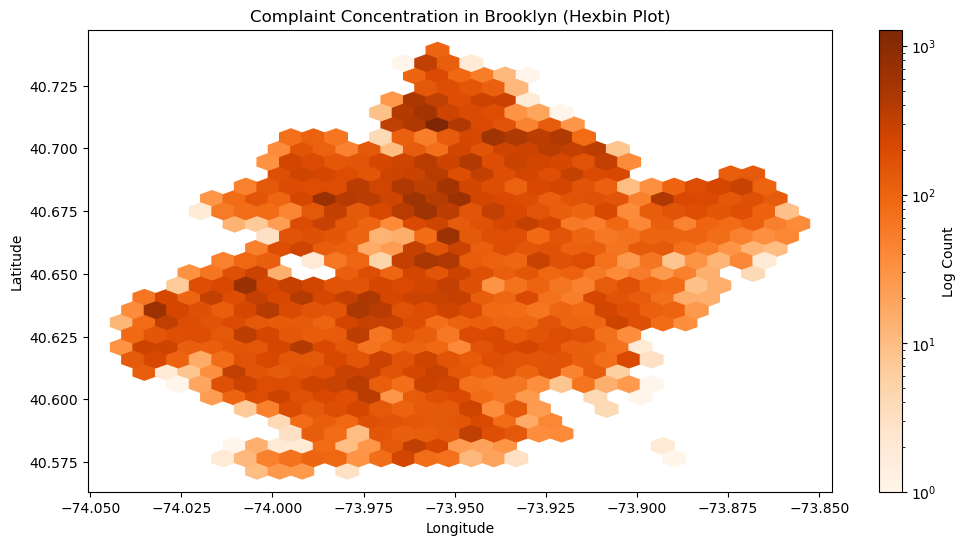

In [49]:
#Draw scatter and hexbin plots for complaint concentration across Brooklyn
brooklyn_df = df[df['Borough'] == 'BROOKLYN']

plt.figure(figsize=(12, 6))
plt.scatter(brooklyn_df['Longitude'], brooklyn_df['Latitude'], s=5, alpha=0.5)
plt.title('Complaint Concentration in Brooklyn (Scatter Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(12, 6))
plt.hexbin(brooklyn_df['Longitude'], brooklyn_df['Latitude'], gridsize=30, cmap='Oranges', bins='log')
plt.title('Complaint Concentration in Brooklyn (Hexbin Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Log Count')
plt.show()

<Axes: >

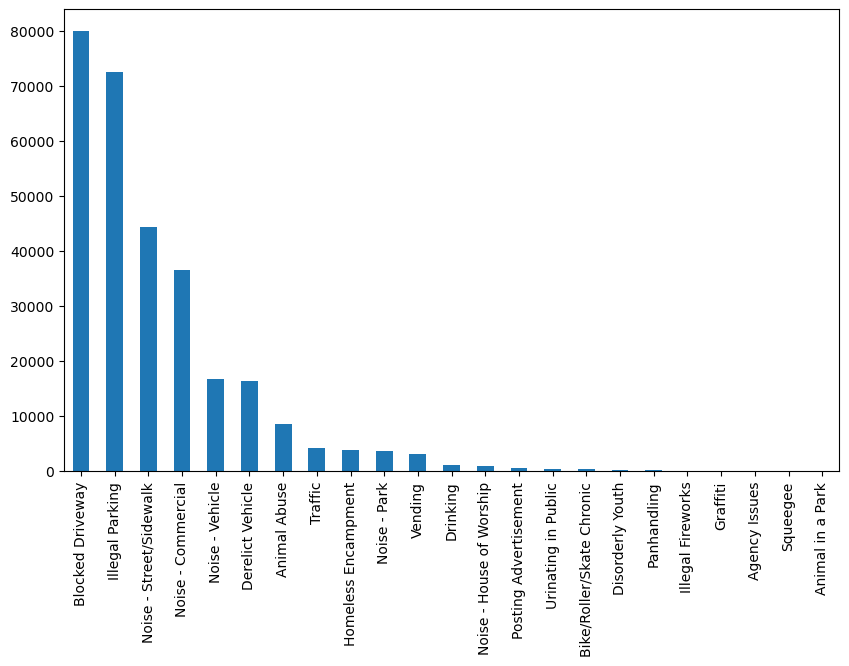

In [50]:
#3.1 Plot a bar graph to show the types of complaints
df['Complaint Type'].value_counts().plot(figsize=(10,6), kind = 'bar')

In [51]:
# 3.2 Check the frequency of various types of complaints for New York City
nyc_complaints = df[df['City'] == 'NEW YORK']['Complaint Type']
nyc_complaints.value_counts(normalize=True)

Noise - Street/Sidewalk      0.298443
Noise - Commercial           0.246501
Illegal Parking              0.176802
Noise - Vehicle              0.084283
Homeless Encampment          0.037528
Blocked Driveway             0.033255
Vending                      0.030561
Animal Abuse                 0.024693
Traffic                      0.023269
Noise - Park                 0.017649
Derelict Vehicle             0.007849
Drinking                     0.004273
Bike/Roller/Skate Chronic    0.003391
Urinating in Public          0.003391
Noise - House of Worship     0.002957
Panhandling                  0.002508
Disorderly Youth             0.001177
Posting Advertisement        0.000604
Illegal Fireworks            0.000542
Graffiti                     0.000279
Squeegee                     0.000046
Name: Complaint Type, dtype: float64

In [52]:
#3.3 Find the top 10 complaint types
top_10_complaints = df['Complaint Type'].value_counts().nlargest(10)
top_10_complaints

Blocked Driveway           79984
Illegal Parking            72531
Noise - Street/Sidewalk    44442
Noise - Commercial         36634
Noise - Vehicle            16727
Derelict Vehicle           16512
Animal Abuse                8538
Traffic                     4276
Homeless Encampment         3802
Noise - Park                3658
Name: Complaint Type, dtype: int64

In [53]:
#3.4 Display the various types of complaints in each city
complaints_by_city = df.groupby(['City', 'Complaint Type']).size().unstack()
complaints_by_city

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,41.0,NaN,NaN,40.0,23.0,2.0,1.0,1.0,2.0,...,14.0,2.0,27.0,9.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,131.0,NaN,15.0,2720.0,323.0,4.0,38.0,4.0,19.0,...,17.0,56.0,351.0,208.0,2.0,3.0,NaN,42.0,8.0,39.0
Astoria,NaN,NaN,NaN,NaN,132.0,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,47.0,NaN,NaN,413.0,179.0,2.0,1.0,1.0,2.0,...,2.0,4.0,16.0,21.0,NaN,NaN,NaN,8.0,NaN,2.0
BELLEROSE,NaN,13.0,NaN,NaN,119.0,102.0,2.0,1.0,NaN,1.0,...,1.0,1.0,11.0,9.0,NaN,1.0,NaN,8.0,NaN,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1567.0,NaN,20.0,13546.0,1858.0,62.0,177.0,10.0,200.0,...,77.0,507.0,8017.0,3106.0,16.0,16.0,NaN,345.0,44.0,324.0
BROOKLYN,NaN,2582.0,NaN,100.0,28628.0,4747.0,70.0,241.0,45.0,732.0,...,333.0,1378.0,12132.0,5104.0,37.0,47.0,NaN,1003.0,125.0,451.0
CAMBRIA HEIGHTS,NaN,13.0,NaN,NaN,141.0,123.0,NaN,NaN,NaN,4.0,...,2.0,NaN,27.0,86.0,NaN,NaN,NaN,7.0,NaN,NaN


In [54]:
#3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows
df_new = df.groupby(['Complaint Type', 'City']).size().unstack(fill_value=0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
Animal Abuse,41,131,0,47,13,2,1567,2582,13,0,...,58,34,35,643,35,1,35,49,88,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,0,0,0,20,100,0,0,...,1,1,0,9,2,1,4,0,5,0
Blocked Driveway,40,2720,132,413,119,3,13546,28628,141,0,...,974,1576,255,2310,236,59,240,1102,1608,23
Derelict Vehicle,23,323,9,179,102,1,1858,4747,123,0,...,335,290,201,1693,10,47,216,298,236,7
Disorderly Youth,2,4,0,2,2,0,62,70,0,0,...,2,1,0,24,2,0,1,0,1,0
Drinking,1,38,0,1,1,1,177,241,0,0,...,13,22,5,160,10,3,2,4,11,0
Graffiti,1,4,0,1,0,0,10,45,0,0,...,1,0,0,6,1,0,0,0,4,0


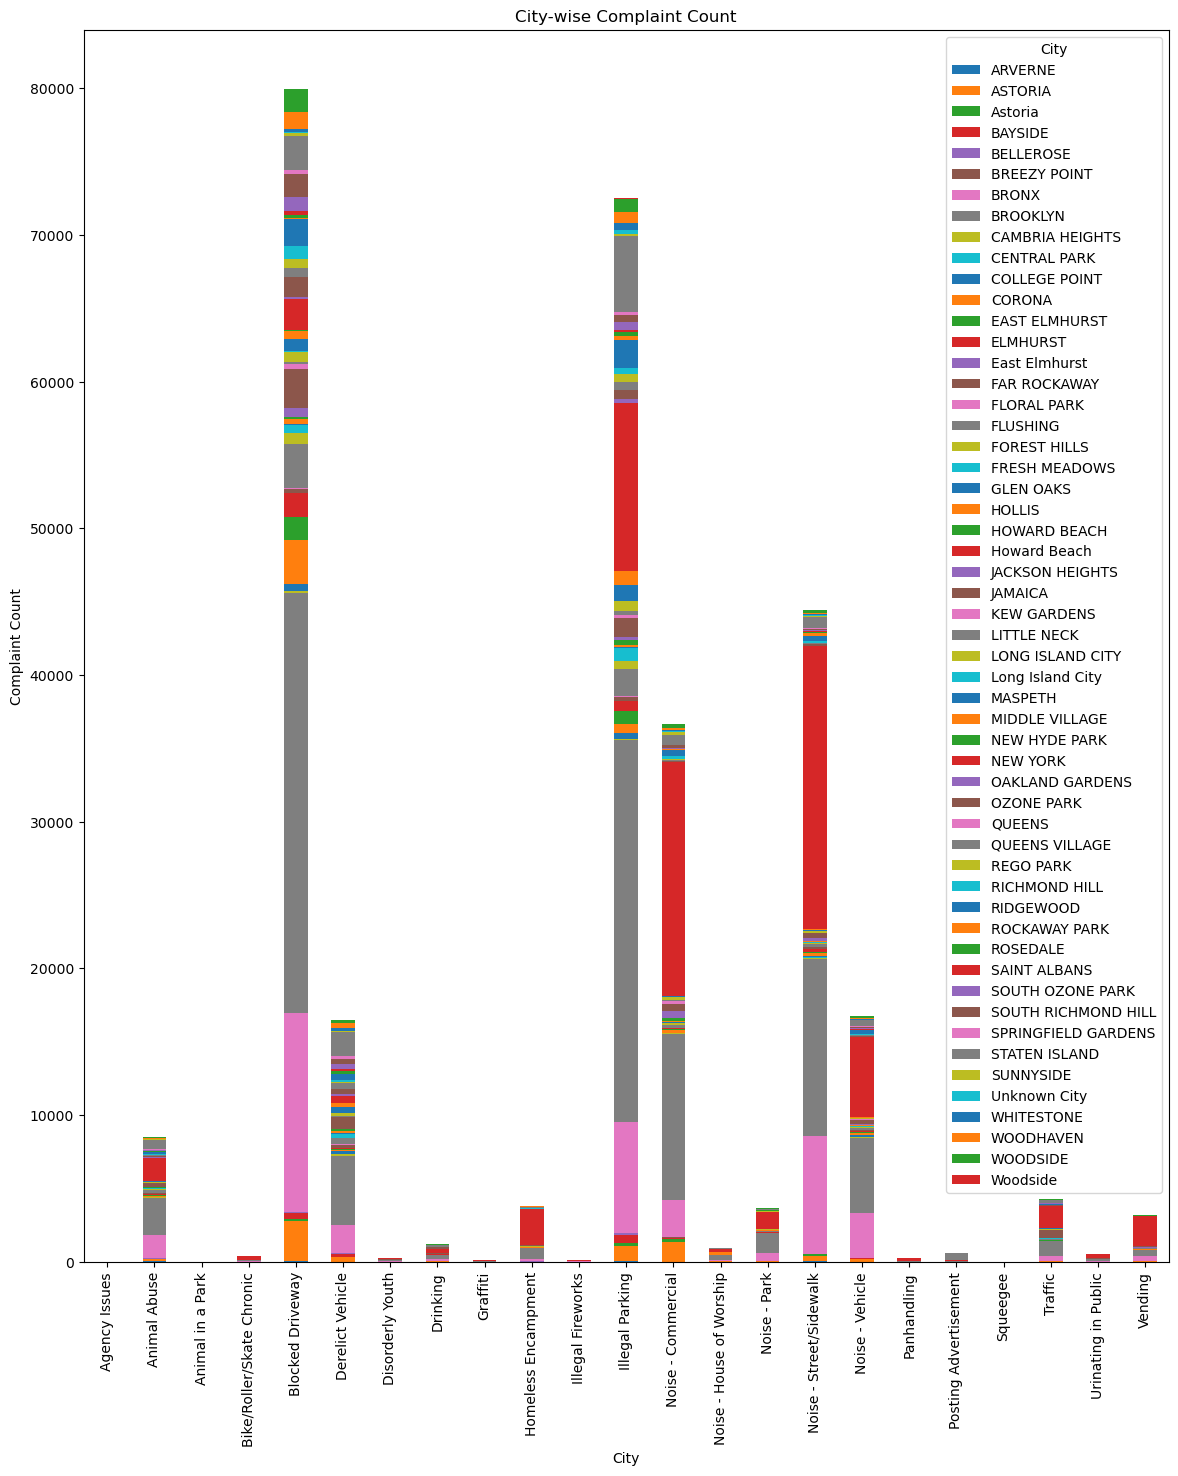

In [55]:
# 4.1 Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints
# performed it only for 5 Cities with largest amount of complains to make the bar readable. When I ran it for all cities, the process takes too much time
df_new.plot(kind='bar', stacked=True, figsize=(14,16), title="City-wise Complaint Count")
plt.ylabel('Complaint Count')
plt.xlabel('City')
plt.show()

In [67]:
# 4.2 Sort the complaint types based on the average Request_Closing_Time grouping them for different locations
df_grouped = df.groupby(['City', 'Complaint Type'])['Request_Closing_Time'].agg('mean').reset_index()
df_sorted = df_grouped.sort_values('Request_Closing_Time', ascending=False).reset_index().drop(columns='index')
df_sorted

,City,Complaint Type,Request_Closing_Time
0,QUEENS,Animal in a Park,1212634.0
1,QUEENS VILLAGE,Graffiti,191995.0
2,BELLEROSE,Homeless Encampment,140930.0
3,SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,111277.0
4,OAKLAND GARDENS,Homeless Encampment,103156.0
...,...,...,...
770,SUNNYSIDE,Urinating in Public,985.0
771,EAST ELMHURST,Bike/Roller/Skate Chronic,908.0
772,RIDGEWOOD,Posting Advertisement,895.0
773,ARVERNE,Drinking,859.0


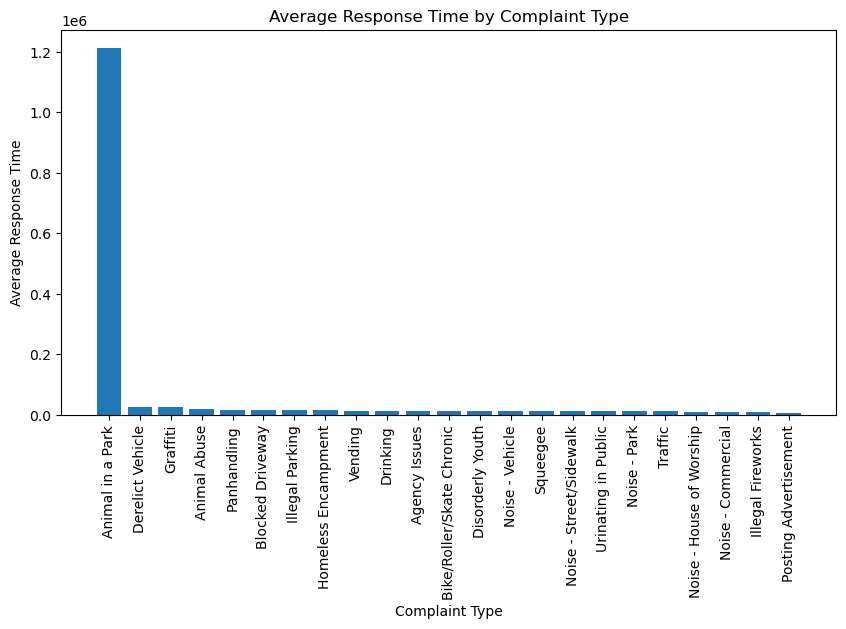

In [69]:
#5.1 Visualize the average of Request_Closing_Time complaint types is similar (overall)
mean_response_time = df.groupby('Complaint Type')['Request_Closing_Time'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(mean_response_time.index, mean_response_time.values)
plt.xticks(rotation=90)
plt.title('Average Response Time by Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time')
plt.show()


T-test between 'Illegal Parking' and 'Derelict Vehicle':
t-statistic: -51.54024865628389
p-value: 0.0
Reject null hypothesis: The two groups have different average response times.

T-test between 'Illegal Parking' and 'Noise - Vehicle':
t-statistic: 15.954400064407366
p-value: 3.186897653641478e-57
Reject null hypothesis: The two groups have different average response times.

T-test between 'Illegal Parking' and 'Noise - Commercial':
t-statistic: 32.62880586411229
p-value: 2.1216952734015416e-232
Reject null hypothesis: The two groups have different average response times.

T-test between 'Derelict Vehicle' and 'Noise - Vehicle':
t-statistic: 42.49689070215022
p-value: 0.0
Reject null hypothesis: The two groups have different average response times.

T-test between 'Derelict Vehicle' and 'Noise - Commercial':
t-statistic: 62.532293763857425
p-value: 0.0
Reject null hypothesis: The two groups have different average response times.

T-test between 'Noise - Vehicle' and 'Noise - Commercia

In [70]:
# 6. Identify the significant variables by performing statistical analysis using p-values   
import itertools

# 4 Four Complaint Types with largest Request Closing Time choosen for the tests
complaint_types = [
    'Derelict Vehicle',
    'Graffiti',
    'Animal Abuse',
    'Panhandling',
]

# Perform t-tests for all pairs of complaint types
for type1, type2 in itertools.combinations(complaint_types, 2):
    df1 = df[df['Complaint Type'] == type1]['Request_Closing_Time']
    df2 = df[df['Complaint Type'] == type2]['Request_Closing_Time']
    
    # Perform a two-sample t-test with equal variances
    t_stat, p_val = stats.ttest_ind(df1, df2, equal_var=True)
    
    # Print the results
    print(f"T-test between '{type1}' and '{type2}':")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_val}")
    if p_val < 0.05:
        print("Reject null hypothesis: The two groups have different average response times.")
    else:
        print("Fail to reject null hypothesis: The two groups have similar average response times.")
    print()

T-test between 'Derelict Vehicle' and 'Graffiti':
t-statistic: 0.6410845454818334
p-value: 0.5214765905452523
Fail to reject null hypothesis: The two groups have similar average response times.

T-test between 'Derelict Vehicle' and 'Animal Abuse':
t-statistic: 17.457332581214445
p-value: 7.639507806443254e-68
Reject null hypothesis: The two groups have different average response times.

T-test between 'Derelict Vehicle' and 'Panhandling':
t-statistic: 4.260951870527192
p-value: 2.0466869012044264e-05
Reject null hypothesis: The two groups have different average response times.

T-test between 'Graffiti' and 'Animal Abuse':
t-statistic: 2.274815960839583
p-value: 0.022941331296217858
Reject null hypothesis: The two groups have different average response times.

T-test between 'Graffiti' and 'Panhandling':
t-statistic: 2.249494377292676
p-value: 0.025060540178121926
Reject null hypothesis: The two groups have different average response times.

T-test between 'Animal Abuse' and 'Panhandl

In [71]:
#7 Perform a Kruskal-Wallis H test
#7.1 Fail to reject H0: All sample distributions are equal
#7.2 Reject H0: One or more sample distributions are not equal

import itertools

# 4 Four Complaint Types with largest Request Closing Time
complaint_type_1 = 'Derelict Vehicle'
complaint_type_2 = 'Graffiti'
complaint_type_3 = 'Animal Abuse'
complaint_type_4 = 'Panhandling'

# Filter the DataFrame for the selected complaint types
df_1 = df[df['Complaint Type'] == complaint_type_1]['Request_Closing_Time']
df_2 = df[df['Complaint Type'] == complaint_type_2]['Request_Closing_Time']
df_3 = df[df['Complaint Type'] == complaint_type_3]['Request_Closing_Time']
df_4 = df[df['Complaint Type'] == complaint_type_4]['Request_Closing_Time']

# Perform a Kruskal-Wallis H test
h_stat, p_val = stats.kruskal(df_1, df_2, df_3)

if p_val < 0.05:
    print("Reject H0: One or more distributions are not equal")
else:
    print("Fail to reject H0: All distributions are equal")
print(f"H-statistic: {h_stat}")
print(f"p-value: {p_val}")

Reject H0: One or more distributions are not equal
H-statistic: 108.8809322328064
p-value: 2.274081229016254e-24
